### **Pré-requisitos**

In [1]:
import importlib, os 
if importlib.util.find_spec("cv2") is None:
    !pip install opencv-python
if importlib.util.find_spec("pprint") is None:
    !pip install pprint
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
if not os.path.exists('suporte/lena_std.jpg'):
    !wget https://github.com/iperetta/FEELT31526/raw/master/aula05/lena_std.jpg -P suporte/
if not os.path.exists('suporte/baboon.png'):
    !wget https://github.com/iperetta/FEELT31526/raw/master/aula05/baboon.png -P suporte/
if not os.path.exists('suporte/cameraman.png'):
    !wget https://github.com/iperetta/FEELT31526/raw/master/aula05/cameraman.png -P suporte/
if not os.path.exists('suporte/chess.jpg'):
    !wget https://github.com/iperetta/FEELT31526/raw/master/aula05/chess.jpg -P suporte/
if not os.path.exists('suporte/face.png'):
    !wget https://github.com/iperetta/FEELT31526/raw/master/aula05/face.png -P suporte/
if not os.path.exists('suporte/fruits.png'):
    !wget https://github.com/iperetta/FEELT31526/raw/master/aula05/fruits.png -P suporte/
if not os.path.exists('suporte/fft2d.svg'):
    !wget https://github.com/iperetta/FEELT31526/raw/master/aula05/fft2d.svg -P suporte/

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

In [3]:
def graph_size(n):
    """Função auxiliar para definir tamanho dos gráficos"""
    return (n*(1+5**0.5)/2, n)

def imshow(im, cmap='gray'):
    if len(im.shape) == 2 or (len(im.shape) == 3 and im.shape[2] == 1):
        plt.imshow(im, cmap=cmap, norm=plt.Normalize(vmin=0, vmax=255))
    else:
        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

In [4]:
img01 = cv2.cvtColor(cv2.imread('suporte/face.png'), cv2.COLOR_BGR2GRAY)
img02 = cv2.cvtColor(cv2.imread('suporte/cameraman.png'), cv2.COLOR_BGR2GRAY)
img03 = cv2.cvtColor(cv2.imread('suporte/fruits.png'), cv2.COLOR_BGR2GRAY)
img04 = cv2.cvtColor(cv2.imread('suporte/baboon.png'), cv2.COLOR_BGR2GRAY)

**Fontes:** 
- Imagem `face.png` ([_Face Icon_](https://iconscout.com/icons/face)) por [_Twitter Emoji_](https://iconscout.com/contributors/twitter-inc) disponível no site [_Iconscout_](https://iconscout.com).
- Imagem `cameraman.png` retirada do repositório [_cameraman_](https://github.com/antimatter15/cameraman) no _Github_ do usuário _antimatter15_ (creditado ao MIT).
- Images `fruits.png` e `baboon.png` retiradas do site [_Public-Domain Test Images for Homeworks and Projects_](https://homepages.cae.wisc.edu/~ece533/images/).

# **Aula 05a: Imagens**

## **CURIOSIDADE: _Como as telas de aparelhos eletrônicos "enganam" seus olhos_**

Na retina, a camada de tecido mais interna e sensível à luz dos nossos olhos, habrigam células fotorreceptoras que é capaz de fototransdução visual, ou seja, convertem a luz (radiação eletromagnética visível) em sinais que podem estimular processos biológicos. 

![Diagrama olho](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Schematic_diagram_of_the_human_eye_pt.svg/472px-Schematic_diagram_of_the_human_eye_pt.svg.png)


Existem atualmente três tipos conhecidos de células fotorreceptoras nos olhos dos mamíferos: **bastonetes**, **cones** e **células ganglionares retinais**:

- As *células ganglionares retinais intrinsecamente fotossensíveis*, descoberta nos anos 1990s, não contribuem para a visão diretamente, mas acredita-se que apoiam os ritmos circadianos e o reflexo pupilar.

- Os *bastonetes* são mais estreitos do que os cones e são extremamente sensíveis uma vez que podem ser ativados por um único fóton. Em níveis de luz muito baixos, a experiência visual é baseada exclusivamente no sinal dos bastonetes.

- Os cones requerem luz significativamente mais brilhante para produzir um sinal. Em humanos, existem três tipos diferentes de células cônicas, que se distinguem por seu padrão de resposta à luz de diferentes comprimentos de onda. A experiência da cor é obtida a partir desses três sinais distintos.

Podemos então entender porque as cores não podem ser vistas em níveis baixos de luz, quando apenas o bastonete e não as células fotorreceptoras dos cones estão ativas.

Os três tipos de células cônicas respondem (aproximadamente) à luz de comprimentos de onda curtos (região do azul, S), médios (região do verde, M) e longos (região do vermelho, L):

![Espectro e cones](https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/Cone-fundamentals-with-srgb-spectrum.svg/540px-Cone-fundamentals-with-srgb-spectrum.svg.png)

Acredito que você reconheça essas cores: o padrão **RGB (_red-green-blue_)** para imagens digitais. 

O modelo de cores RGB é um modelo de cores aditivo no qual as luzes vermelha, verde e azul são adicionadas com várias intensidades para reproduzir uma ampla gama de cores. O objetivo principal do modelo de cores RGB é a detecção, representação e exibição de imagens em sistemas eletrônicos, como televisores e computadores, embora também tenha sido usado na fotografia convencional. Antes da era eletrônica, o modelo de cores RGB já contava com uma teoria sólida, baseada na percepção humana das cores (classificada como tricromatismo ou visão tricromática).

Na imagem a seguir, você encontra um enfoque de linha tricromática em tela de tubo de raios catódicos (mais fácil de se perceber). Essa tecnologia, presente em quase todos os monitores e telas coloridas eletrônicas modernas, cria muitas cores visíveis através da combinação de diferentes níveis de três cores primárias: vermelho, azul e verde.

![Enfoque tela de tubo de raios catódicos](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Tricolour_television_close_up.jpg/320px-Tricolour_television_close_up.jpg)

Você pode ver um LED RGB em funcionamento aqui:

![youtube](YouTube-icon-pq.png) [How do RGB LEDs work? (Demo)](https://www.youtube.com/watch?v=x4h9R40umN4) (apenas demonstração, 38 segundos).

![Sobreposição de cores](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/Red%2C_green_and_blue%2C_overlapping_basic_colors.jpg/300px-Red%2C_green_and_blue%2C_overlapping_basic_colors.jpg)

Podemos testar esse fenômeno. Usando números entre 0 (mínima intensidade) e 255 (máxima intensidade para 8-bits não sinalizados, ou `uint8`), podemos criar muitas cores.

In [5]:
@interact(vermelho=(0, 255, 1), verde=(0, 255, 1), azul=(0, 255, 1))
def make_color(vermelho=0, verde=0, azul=0):
    base = np.ones((128, 128, 3), dtype='uint8')
    base[:,:,0] = base[:,:,0]*vermelho
    base[:,:,1] = base[:,:,1]*verde
    base[:,:,2] = base[:,:,2]*azul
    plt.imshow(base)

interactive(children=(IntSlider(value=0, description='vermelho', max=255), IntSlider(value=0, description='ver…

As cores que estamos vendo não são as cores que enxergamos na natureza. Essas cores, além de "discretas", são estimulações em paralelo específicas para nossos cones em diferentes níveis de intensidade. O efeito final é similar ao que acontece na natureza: uma cor analógica pode ser resultado da refleção de diversos comprimentos de onda de luz visível, mas nossos olhos estão "filtrando" e captando as intensidades apenas das componentes que interagem com nossos cones. 

Note que essas "cores digitais discretas", usando 8-bits para intensidades de cores primárias, **podem simular $256^3 = $ 16.777.216 cores distintas**, o suficiente para enganar nossos olhos.

## **Exemplo de imagem digital**

Esta é [Lena](http://www.lenna.org), uma das mais [famosas e controversas imagens](http://ndevilla.free.fr/lena/) usadas na história da pesquisa em processamento de imagem. Sem querer me envolver na discussão, mas desejoso de um resgate histórico, proponho usá-la para desenvolver nossos exemplos.

![Lena](suporte/lena_std.jpg)

Vamos usar a biblioteca `OpenCV` ([documentação em inglês](https://docs.opencv.org/master/)), através do módulo `cv2` de Python, para explorar imagens. 

As imagens são armazenadas e lidas como uma matriz tridimensional com as seguintes dimensões: linhas (altura) x colunas (largura) x cores (nesse exemplo, 3 cores no [formato RGB](https://pt.wikipedia.org/wiki/RGB)).

In [6]:
lena = cv2.imread('suporte/lena_std.jpg')
print(type(lena), lena.shape, lena.dtype)

print(lena[:,:,0], lena[:,:,1], lena[:,:,2], sep='\n')

<class 'numpy.ndarray'> (256, 256, 3) uint8
[[124 124 125 ... 125 122  94]
 [122 122 122 ... 142 138 101]
 [120 120 120 ... 132 128  93]
 ...
 [ 60  64  64 ...  75  80  81]
 [ 58  62  62 ...  81  80  79]
 [ 55  59  59 ...  87  88  87]]
[[135 135 136 ... 139 144 120]
 [136 136 136 ... 150 151 116]
 [135 135 135 ... 130 122  88]
 ...
 [ 25  30  29 ...  55  62  65]
 [ 25  28  27 ...  64  68  68]
 [ 22  25  26 ...  72  77  77]]
[[225 225 226 ... 235 239 214]
 [225 225 225 ... 243 243 208]
 [227 227 227 ... 219 209 173]
 ...
 [ 89  95  96 ... 144 155 159]
 [ 86  92  94 ... 155 164 165]
 [ 83  89  93 ... 164 174 177]]


Observe que a ordem do canal das cores quando a imagem é lida pelo `cv2.imread` é **BGR** e **não RGB**. Já a função `matplotlib.pyplot.imshow` reconhece a ordem dos canais na sequência **RGB**. Portanto, precisamos fazer alguns ajustes para possibilitar a correta visualização da imagem:

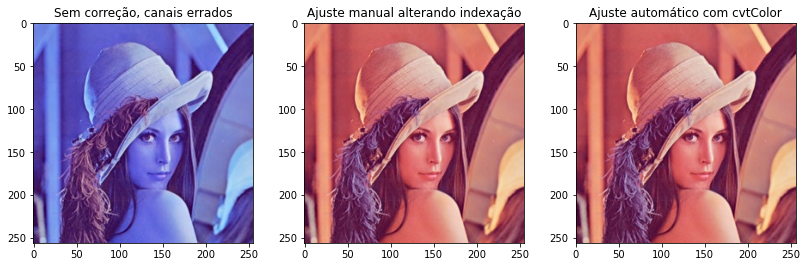

In [7]:
plt.figure(figsize=graph_size(7))

plt.subplot(131)
plt.imshow(lena) # imshow com canais como RGB, mas lena foi acessada como BGR!
plt.title("Sem correção, canais errados")

plt.subplot(132)
plt.imshow(lena[:,:,[2,1,0]]) # ajuste manual
plt.title("Ajuste manual alterando indexação")

plt.subplot(133)
plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)) # ajuste automático
plt.title("Ajuste automático com cvtColor")

plt.tight_layout()
plt.show()

Como exemplo, se definirmos qualquer dos canais 0 (B, azul), 1 (G, verde) ou 2 (R, vermelho) como 0 (nível mais baixo, equivalente ao preto), podemos visualizar o que acontece com a imagem ao perder canais de cor:

In [8]:
@interact(im=fixed(lena), R_zero=False, G_zero=False, B_zero=False)
def show_lena(im, R_zero, G_zero, B_zero):
    
    def force_channels2zero(im, channels):
        im = im.copy()
        im[:, :, channels] = 0 # preenche com zeros todos os elementos dos canais indicados
        return im
    
    channels2zero = []
    if R_zero: channels2zero.append(2) # padrão BGR
    if G_zero: channels2zero.append(1) # padrão BGR
    if B_zero: channels2zero.append(0) # padrão BGR
        
    mod = force_channels2zero(im, channels2zero)
    
    plt.figure(figsize=graph_size(5))
    imshow(mod)

interactive(children=(Checkbox(value=False, description='R_zero'), Checkbox(value=False, description='G_zero')…

Se quiser usar o módulo `cv2` para salvar a imagem modificada:

In [9]:
mod_lena = np.zeros(lena.shape)
mod_lena[:,:,2] = lena[:,:,2]
cv2.imwrite('suporte/lena_opencv_red.jpg', mod_lena);

![Lena vermelha](suporte/lena_opencv_red.jpg)

## **Tons de cinzas**

A imagem em tons ou escala de cinza (_grayscale_), também conhecida como "imagem preto e branco", é uma imagem que possui apenas informação de "claro-escuro" (luminosidade ou brilho). Para se obter uma versão em tons de cinza de uma imagem colorida em formato RGB, devemos essencialmente converter a imagem para o formato **_YCbCr_** ([mais informações, em inglês](https://en.wikipedia.org/wiki/YCbCr)) e utilizar somente o canal _Y_ (conhecido como **luma**).

Note que, tendo a visão humana sensibilidade espacial mais fina para diferenças de luminância ("preto e branco") do que para diferenças cromáticas, o uso da imagem em tons de cinza normalmente faz parte da etapa de pré-processamento com imagens, em especial para técnicas de aprendizado de máquina.

Com objetivos didáticos, adotaremos as conversões especificadas na norma _JPEG File Interchange Format (JFIF)_ ([relatório técnico TR/98, em inglês](http://www.ecma-international.org/publications/techreports/E-TR-098.htm)) que, por sua vez, segue a Recomendação _ITU-R BT.601_ com a diferença de normalizar os canais _YCbCr_ para ocupar os 256 níveis completos de uma codificação binária de 8 bits. Para converter para o formato **YCbCr** a partir do formato **RGB 8-bits**, podemos utilizar as seguintes expressões matriciais  para o cálculo dos canais luma (_grayscale_), _Cb_ e _Cr_ (ambos para posterior recuperação da imagem em RGB):

> $\left[ \begin{array}{c} Y \\ C_b\\ C_r\\ \end{array} \right] = 
\left[ \begin{array}{ccc} 
0 & 0,299 & 0,587 & 0,114\\
128 & -0,1687 & -0,3313 & 0,5\\
128 & 0,5 & -0,4187 & -0,0813\\
\end{array} \right] \cdot
\left[ \begin{array}{c} 1\\ R \\ G\\ B\\ \end{array} \right]$

onde $R$, $G$ e $B$ são os níveis de cada canal de 8-bits (vermelho, verde e azul, respectivamente), valores esses entre 0 (intensidade mínima, usada para mostrar a cor preta) e 255 (intensidade máxima, usada para mostrar a cor branca). Note que $Y$, $Cb$ e $Cr$ devem ser arredondados para níveis de inteiros de 8-bits (`uint8`) e ter um valor máximo igual a 255, sendo necessário garantir isso.

Para a operação inversa, temos a seguinte expressão matricial:

> $\left[ \begin{array}{c} R\\ G\\ B\\ \end{array} \right] = 
\left[ \begin{array}{ccc} 
1 & 0 & 1,402\\
1 & -0,34414 & -0,71414\\
1 & 1,772 & 0\\
\end{array} \right] \cdot
\left[ \begin{array}{c} Y \\ C_b -128\\ C_r-128\\ \end{array} \right]$

Como nesse momento estamos interessados apenas no canal _Y_ para gerar nossa imagem em tons de cinza, temos que:

> $Y =  \left[ \begin{array}{ccc} K_R & K_G & K_B\\ \end{array} \right]  \cdot \left[ \begin{array}{c} R\\ G\\ B\\ \end{array} \right] =
\left[ \begin{array}{ccc} 0,299 & 0,587 & 0,114\\ \end{array} \right]  \cdot \left[ \begin{array}{c} R\\ G'\\ B\\ \end{array} \right] =
0,299\cdot R + 0,587\cdot G + 0,114\cdot B$

> $Y_{uint8} =  \mathrm{round}\left(0,299\cdot R + 0,587\cdot G + 0,114\cdot B\right)$

Podemos calcular nossa imagem ...

In [10]:
lena_gray = np.uint8(np.round(0.299*lena[:,:,2] + 0.587*lena[:,:,1] + 0.114*lena[:,:,0])) # a imagem estará ao contrário: BGR

# IMPORTANTE!! Verificar se a imagem em tons de cinza é uma matrix 2D
print(type(lena_gray), lena_gray.shape, lena_gray.dtype)
print('nível mínimo:', np.min(lena_gray), '| nível máximo:', np.max(lena_gray))

<class 'numpy.ndarray'> (256, 256) uint8
nível mínimo: 20 | nível máximo: 239


... ou utilizar a função `cv2.cvtColor` com a opção `cv2.COLOR_BGR2GRAY`:

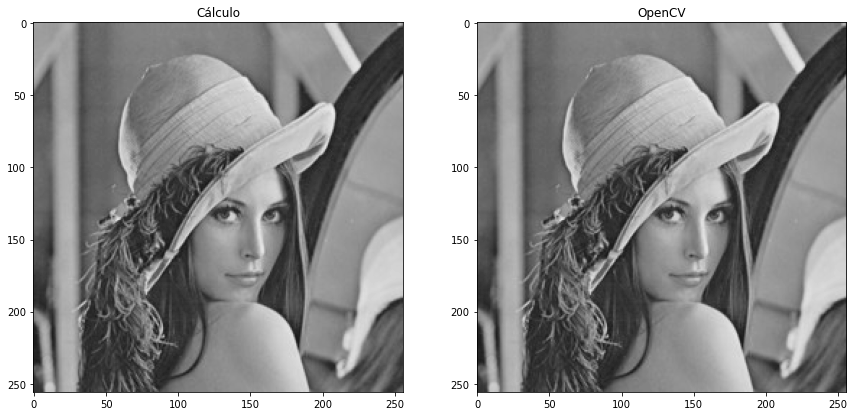

In [11]:
plt.figure(figsize=graph_size(9))
plt.subplot(121)
imshow(lena_gray)
plt.title('Cálculo')
plt.subplot(122)
lena_gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY) #
imshow(lena_gray)
plt.title('OpenCV')
plt.show()

Um detalhe sobre visualização de imagens e funções prontas:

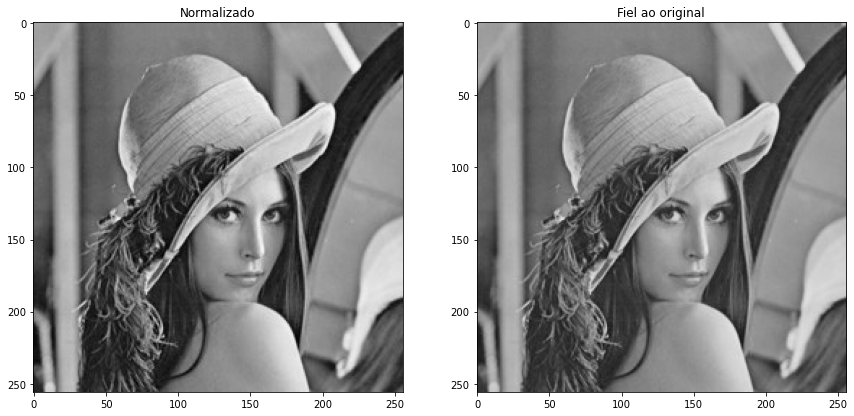

In [12]:
plt.figure(figsize=graph_size(9))
plt.subplot(121)
plt.imshow(lena_gray, cmap='gray') # DEFAULT: norm=plt.Normalize(vmin=min(im), vmax=max(im))
plt.title('Normalizado')
plt.subplot(122)
plt.imshow(lena_gray, cmap='gray', norm=plt.Normalize(vmin=0, vmax=255)) # neste caso, fiel ao original
plt.title('Fiel ao original')
plt.show()

---

# **Aula 05b: Transformada de Fourier 2D**



A FFT 2D basicamente é a aplicação em diferentes direções (colunas e linhas, ou vice-versa) de FFT unidimensional que já conhecemos.

![fft2d](suporte/fft2d.svg)

Podemos notar que as frequências menores acabam por ficar nas bordas da matriz e o limite de Nyquist no centro. Isso não é usual na área de processamento de imagens, sendo indicado a operação de ajuste de linhas e colunas (_shift_) para que as frequências menores fiquem no centro (o elemento central fica sendo a componente contínua, ou média do nível dos pixels da imagem) e o limite de Nyquist fique nas bordas.

Outro efeito interessante é o de amplitudes elevadas no espectro, o que impede a correta representação visual no espaço de 8-bits. A solução adotada é a de visualização do espectro de potência da imagem, em decibéis (dB):

> $\large S_\mathrm{dB} = 20\,\log_{10} |S|$

onde $S$ é a matrix de valores complexos resultante da FFT 2D.

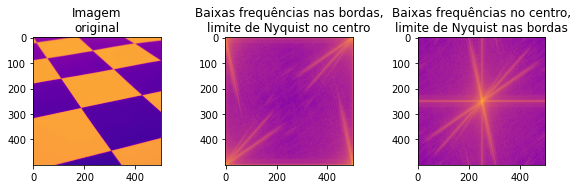

In [22]:
chess = cv2.cvtColor(cv2.imread('suporte/chess.jpg'), cv2.COLOR_BGR2GRAY)
spec = np.fft.fft2(chess)
specshift = np.fft.fftshift(spec) 

plt.figure(figsize=graph_size(5))
plt.subplot(131)
imshow(chess, cmap="plasma")
plt.title('Imagem\noriginal')

plt.subplot(132)
plt.imshow(20*np.log10(np.abs(spec)), cmap="plasma")
plt.title('Baixas frequências nas bordas,\nlimite de Nyquist no centro')

plt.subplot(133)
plt.imshow(20*np.log10(np.abs(specshift)), cmap="plasma")
plt.title('Baixas frequências no centro,\nlimite de Nyquist nas bordas')

plt.tight_layout()
plt.show()

Antes de nos aprofundarmos nesse assunto, vamos entender as operações necessárias:

In [23]:
@interact(im=fixed(lena_gray), dB=False, deslocamento=False)
def show_grayscale(im, dB, deslocamento):
    
    def fft2d(im):
        aux = np.array(im, dtype=complex)
        for i in range(im.shape[1]): # primeiro, coluna a coluna
            aux[:, [i]] = np.fft.fft(aux[:, [i]], axis=0)
        for j in range(aux.shape[0]): # segundo, linha a linha
            aux[[j], :] = np.fft.fft(aux[[j], :], axis=1)
        # para colocar as altas frequências no centro (limite de Nyquist)
        if deslocamento:
            aux = np.roll(aux, aux.shape[0]//2, axis=0)
            aux = np.roll(aux, aux.shape[0]//2, axis=1)
        return aux
    
    f = fft2d(im)
    
    plt.figure(figsize=graph_size(12))
    plt.subplot(131)
    imshow(im)
    plt.title('Imagem em tons de cinza')
    plt.subplot(132)
    if dB:
        plt.imshow(20*np.log10(np.abs(f)), cmap='gray') # 
    else:
        plt.imshow(np.abs(f), cmap='gray')
    plt.title('Transformada de Fourier 2D, espectro de magnitude')
    plt.subplot(133)
    plt.imshow(np.angle(f), cmap='gray')
    plt.title('Transformada de Fourier 2D, espectro de fase')

interactive(children=(Checkbox(value=False, description='dB'), Checkbox(value=False, description='deslocamento…

Podemos chegar no mesmo resultado com auxílio das funções `numpy.fft.fft2` e `numpy.fft.fftshift`:

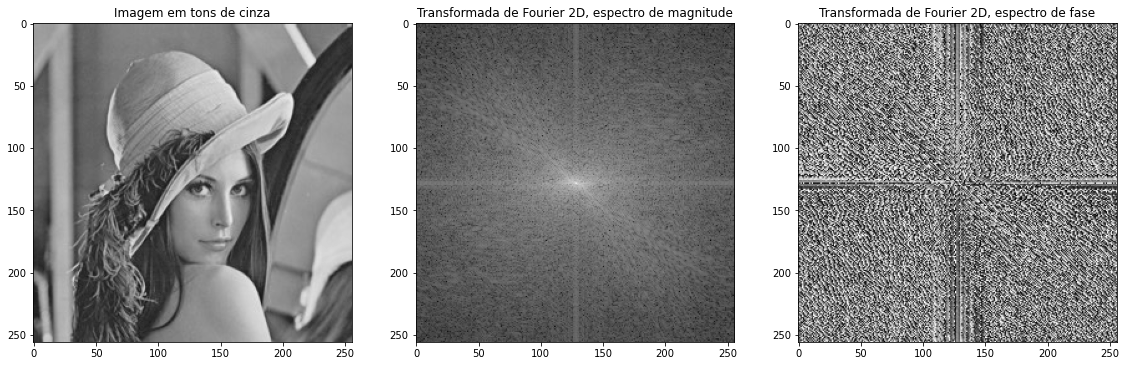

In [24]:
aux = np.fft.fft2(lena_gray)
auxshift = np.fft.fftshift(aux) 

plt.figure(figsize=graph_size(12))
plt.subplot(131)
imshow(lena_gray)
plt.title('Imagem em tons de cinza')
plt.subplot(132)
plt.imshow(20*np.log10(np.abs(auxshift)), cmap='gray') # 
plt.title('Transformada de Fourier 2D, espectro de magnitude')
plt.subplot(133)
plt.imshow(np.angle(auxshift), cmap='gray')
plt.title('Transformada de Fourier 2D, espectro de fase')
plt.show()

## **Intuição sobre a FFT 2D**

Essa seção foi adaptada do trabalho de Mike X Cohen que pode ser visto aqui:

![youtube](YouTube-icon-pq.png) [How the 2D FFT works](https://www.youtube.com/watch?v=v743U7gvLq0) (áudio em inglês)

Vamos começar com uma imagem simples, uma senóide que se propaga em uma única direção (a outra é constante) vista de cima:

In [25]:
@interact(elev=(-90, 90, 10), azim=(0, 360,10))
def show_sine(elev=0, azim=180):
    x, y = np.mgrid[-91:91, -91:91]
    xp = x*np.cos(np.pi/2) + y*np.sin(np.pi/2)
    img = 0.5*np.sin(2*np.pi*0.02*xp)

    plt.figure(figsize=graph_size(7))
    ax = plt.subplot(111, projection='3d')
    ax.plot_surface(x, y,img, cmap='plasma')
    ax.view_init(elev, azim)

interactive(children=(IntSlider(value=0, description='elev', max=90, min=-90, step=10), IntSlider(value=180, d…

Agora podemos analisar qual o impacto das características de nossa senóide no espectros de magnitude e de fase da FFT 2D:

In [26]:
@interact(sinephas=(0, np.pi, np.pi/30), sinefreq=(1e-4, .4, (.4-1e-4)/49))
def intuition_fft2d(sinefreq=0.02, sinephas=np.pi/2):
    x, y = np.mgrid[-91:91, -91:91]
    xp = x*np.cos(sinephas) + y*np.sin(sinephas)
    img = np.sin(2*np.pi*sinefreq*xp)

    spec = np.fft.fft2(img)
    specshift = np.fft.fftshift(spec) 

    plt.figure(figsize=graph_size(16))
    plt.subplot(131)
    plt.imshow(img, cmap='plasma')
    plt.title('Imagem em tons de cinza')
    plt.subplot(132)
    plt.imshow(20*np.log10(np.abs(specshift)+1e-12), cmap='plasma')
    plt.title('Transformada de Fourier 2D, espectro de magnitude')
    plt.subplot(133)
    plt.imshow(np.angle(specshift), cmap='plasma')
    plt.title('Transformada de Fourier 2D, espectro de fase')
    plt.show()

interactive(children=(FloatSlider(value=0.02, description='sinefreq', max=0.4, min=0.0001, step=0.008161224489…

E com relação a uma forma redonda? A seção transversal próxima ao topo de uma gaussiana 2D nos dá um círculo de largura controlável:

In [27]:
@interact(desloca_x=(-80,80,20), desloca_y=(-80,80,20), largura=(5, 40, 5))
def intuition_fft2d_2(desloca_x=0, desloca_y=20, largura=20):
    x, y = np.mgrid[-91:91, -91:91]

    mx = x - desloca_x
    my = y - desloca_y

    gaus2d = np.exp(-(mx**2 + my**2) / (2*largura**2))
    img = np.zeros(gaus2d.shape);
    img[gaus2d > 0.9] = 1.0;

    spec = np.fft.fft2(img)
    specshift = np.fft.fftshift(spec) 

    plt.figure(figsize=graph_size(16))
    plt.subplot(131)
    plt.imshow(img, cmap='plasma')
    plt.title('Imagem em tons de cinza')
    plt.subplot(132)
    plt.imshow(20*np.log10(np.abs(specshift)+1e-12), cmap='plasma')
    plt.title('Transformada de Fourier 2D, espectro de magnitude')
    plt.subplot(133)
    plt.imshow(np.angle(specshift), cmap='plasma')
    plt.title(f'Transformada de Fourier 2D, espectro de fase')
    plt.show()

interactive(children=(IntSlider(value=0, description='desloca_x', max=80, min=-80, step=20), IntSlider(value=2…

## **Todas as imagens são feitas de ondas**


Vamos visualizar como uma imagem arbitrária pode ser decomposta (e reconstruída) em ondas senoidais bidimensionais. 

Essa seção foi inspirada e adaptada do trabalho de Phil Moriarty que pode ser visto aqui:

![youtube](YouTube-icon-pq.png) [Every picture is made of waves - Sixty Symbols](https://www.youtube.com/watch?v=mEN7DTdHbAU) (áudio em inglês)

In [31]:
@interact(figura=['Imagem 1', 'Imagem 2', 'Imagem 3', 'Imagem 4'], n_ondas=(0,127,1), plasma=True)
def build_from_waves(figura='Imagem 1', n_ondas=0, plasma=True):
    
    if figura == 'Imagem 1':
        bp = img01.copy()
    elif figura == 'Imagem 2':
        bp = img02.copy()
    elif figura == 'Imagem 3':
        bp = img03.copy()
    else:
        bp = img04.copy()
        
    M, N = bp.shape
    fbp = np.fft.fft2(bp)
    fbps = np.fft.fftshift(fbp)
    fbps_new = np.zeros_like(fbps)
    fbps_new[M//2-n_ondas:M//2+n_ondas+1, N//2-n_ondas:N//2+n_ondas+1] = fbps[M//2-n_ondas:M//2+n_ondas+1, N//2-n_ondas:N//2+n_ondas+1]
    fbp_new = np.fft.ifftshift(fbps_new)
    bp_new = np.real(np.fft.ifft2(fbp_new))
    
    plt.figure(figsize=graph_size(10))
    plt.imshow(bp_new, cmap=('plasma' if plasma else 'gray'), norm=plt.Normalize(vmin=0, vmax=255))

interactive(children=(Dropdown(description='figura', options=('Imagem 1', 'Imagem 2', 'Imagem 3', 'Imagem 4'),…

---

# **Aula 05c: Métricas, Filtros e Convolução 2D**

## **Métricas comuns**

Duas métricas estatísticas tem significado em imagens, a média e o desvio-padrão.

Ajustes na **média**, ou seja, subtrair a média de todos os pixels da imagem original e adicionar a nova média, significa ajustes no **brilho** da imagem.

Ajustes na **desvio-padrão**, ou seja, dividir todos os pixels pelo desvio-padrão da imagem original e multiplicar pelo novo desvio-padrão, significa ajustes no **contraste** da imagem.

In [13]:
@interact(nova_media=(0, 255, 1), novo_dp=(0, 255, 1))
def show_common(nova_media=124, novo_dp=48):
    muo = np.mean(lena_gray)
    stdo = np.std(lena_gray)
    new_lena = (lena_gray - muo) + nova_media
    new_lena[new_lena > 255] = 255
    new_lena = (new_lena/stdo)*novo_dp
    new_lena[new_lena > 255] = 255
    new_lena[new_lena < 0] = 0
    mun = np.mean(new_lena)
    stdn = np.std(new_lena)
    
    plt.figure(figsize=graph_size(12))
    plt.subplot(121)
    imshow(lena_gray)
    plt.annotate(f' Média:{muo:.2g}, DP:{stdo:.2g}', (0,10), color=('k' if muo > 128 else 'w'), fontsize=14)
    plt.title('Imagem original')
    plt.subplot(122)
    imshow(new_lena)
    plt.annotate(f' Média:{mun:.2g}, DP:{stdn:.2g}', (0,10), color=('k' if mun > 128 else 'w'), fontsize=14)
    plt.title('Imagem original')

interactive(children=(IntSlider(value=124, description='nova_media', max=255), IntSlider(value=48, description…

Quando vimos que podemos construir imagens a partir de ondas, fomos isolando as frequências, da menor para a maior, e zerando as frequências maiores do que um dado limiar que crescia durante o experimento. Basicamente, a cada grupo de ondas que era adicionada para formar a nossa imagem, era como se aplicávamos uma espécie de filtro passa-baixa em degrau. Vamos experimentar agora o que acontece quando implementamos algo que se assemelha a um filtro passa-alta?

In [14]:
@interact(delta=(1,127,1), plasma=True)
def show_hpf(delta=30, plasma=True):
    rows, cols = lena_gray.shape
    crow,ccol = rows//2 , cols//2
    # Filtro na frequência (janela no espaço)
    filtr = np.ones((rows, cols))
    filtr[crow-delta:crow+delta+1, ccol-delta:ccol+delta+1] = 0
    
    # Convolução eficiente
    f = np.fft.fft2(lena_gray)
    fshift = np.fft.fftshift(f)
    fshift = fshift*filtr # convolução no espaço, multiplicação na frequência
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.real(img_back)

    plt.figure(figsize=graph_size(12))
    plt.subplot(121)
    imshow(lena_gray)
    plt.title('Imagem original')
    plt.subplot(122)
    imshow(img_back, cmap=('plasma' if plasma else 'gray'))
    plt.title('Imagem depois do FPA Quadrado'), plt.xticks([]), plt.yticks([])
    plt.show()

interactive(children=(IntSlider(value=30, description='delta', max=127, min=1), Checkbox(value=True, descripti…

O resultado mostra que o filtro passa-altas é uma operação de **detecção de borda**. Isso também mostra que a maioria dos dados da imagem está presente na região de baixa frequência do espectro. 

Se você observar de perto o resultado, poderá ver alguns **artefatos**, algumas estruturas semelhantes a ondas e é chamado de artefatos de anel (_ringing artifacts_). São causados pela filtros retangulares que usamos como máscara. Portanto, filtros retangulares não são usados para operações com imagens, sendo a melhor opção filtros gaussianos.

In [15]:
def gaussian_img(rows, cols, sigma=1):
    """Calcula filtro Gaussiano com tamanho rols x cols"""
    crow,ccol = rows//2 , cols//2
    mx, my = np.mgrid[-crow:crow, -ccol:ccol]
    gauss2d = np.exp(-(mx**2 + my**2) / (2*sigma**2))
    return gauss2d

@interact(sigma=(1,64))
def show_gaussian(sigma=16):
    
    g = gaussian_img(128, 128, sigma)
    M, N = g.shape
    mx, my = np.mgrid[-M//2:M//2, -N//2:N//2]
    
    plt.figure(figsize=graph_size(7))
    ax = plt.subplot(121, projection='3d')
    ax.plot_surface(mx, my, g)
    plt.subplot(122)
    plt.imshow(g, cmap='plasma') # de 0 a 1

interactive(children=(IntSlider(value=16, description='sigma', max=64, min=1), Output()), _dom_classes=('widge…

In [16]:
@interact(delta=(1,127,1), plasma=True, passa_alta=True, ruido=False)
def show_hpf(delta=30, plasma=True, passa_alta=True, ruido=False):
    rows, cols = lena_gray.shape
    # Filtro na frequência (janela no espaço)
    gaus2d = gaussian_img(rows, cols, delta)
    
    # Opção de ruído na imagem
    noise = np.random.randint(low=0, high=32, size=lena_gray.shape)  if ruido else np.zeros_like(lena_gray)
    lena_mod = lena_gray + noise
    
    # Convolução eficiente (1-gaus2d) para FPA, gaus2d para FPB
    f = np.fft.fft2(lena_mod)
    fshift = np.fft.fftshift(f)
    fshift = fshift*((1-gaus2d) if passa_alta else gaus2d) # convolução no espaço, multiplicação na frequência
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.real(img_back)

    plt.figure(figsize=graph_size(12))
    plt.subplot(121)
    imshow(lena_mod)
    plt.title('Imagem original')
    plt.subplot(122)
    imshow(img_back, cmap=('plasma' if plasma else 'gray'))
    plt.title('Imagem depois do ' + ('FPA' if passa_alta else 'FPB') + ' Gaussiano'), plt.xticks([]), plt.yticks([])
    plt.show()

interactive(children=(IntSlider(value=30, description='delta', max=127, min=1), Checkbox(value=True, descripti…

## **Expressão geral de convolução para imagens**

$\large g[x,y] = \omega \ast f[x,y] = \displaystyle\sum_{dx=-a}^a\displaystyle\sum_{dy=-b}^b \omega[a-dx, b-dy]\cdot f[x+dx, y+dy]$

onde $g(x,y)$ é a imagem filtrada, $f(x,y)$ é a imagem original, $\omega$ é o **núcleo** (_kernel_) do filtro -- seria o equivalente à janela no tempo -- também chamado de **matriz de convolução** ou **máscara**. Todo elemento do núcleo é considerado com índices $-a\leq dx \leq a$ e $-b\leq dy \leq b$; o ajuste na expressão é para converter os índices para os de uma matriz regular. Note que o sinal negativo tanto em $dx$ quanto $dy$ significa que a imagem _deve ser revertida em ambos os eixos_ para a convolução.

Um núcleo _normalizado_ tem a soma de seus elementos igual a 1 e possui dimensões ímpares (necessidade de um pixel central).

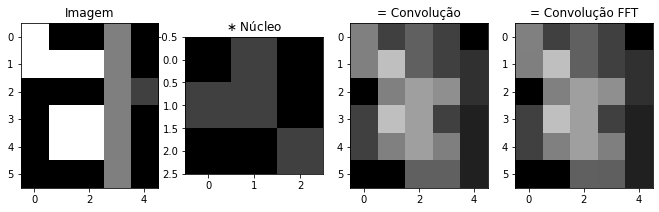

In [36]:
def convolve(im, omega, fft=False):
    M, N = im.shape
    A, B = omega.shape
    a, b = A//2, B//2 # núcleo com dimensões ímpares
    if not fft:
        f = np.array(im, dtype=float)
        g = np.zeros_like(f, dtype=float)
        for x in range(M):
            for y in range(N):
                aux = 0.0
                for dx in range(-a, a+1):
                    for dy in range(-b, b+1):
                        if 0 <= x+dx < M and 0 <= y+dy < N: # ou você pode usar "zero pad" na imagem
                            aux += omega[a-dx, b-dy]*f[x+dx, y+dy]
                g[x, y] = aux
        return g
    else:
        im = np.pad(im, ((0,1), (0,1))) # zero pad últimas linha e coluna
        spi = np.fft.fft2(im)
        spf = np.fft.fft2(omega, s=im.shape)
        g = spi*spf
        f = np.fft.ifft2(g)
        return np.real(f)[1:,1:] # elimina as primeiras linha e coluna

im = np.array([[255,0,0,127,0],[255,255,255,127,0],[0,0,0,127,64],[0,255,255,127,0],[0,255,255,127,0],[0,0,0,127,0]])
kn = np.array([[0,1,0],[1,1,0],[0,0,1]])*1/4
conv = np.uint8(np.round(convolve(im, kn)))
conv2 = np.uint8(np.round(convolve(im, kn, fft=True)))
plt.figure(figsize=graph_size(7))
plt.subplot(141)
imshow(im)
plt.title('Imagem')
plt.subplot(142)
imshow(kn*255)
plt.title(r'$\ast$ Núcleo')
plt.subplot(143)
imshow(conv, cmap='gray')
plt.title('= Convolução')
plt.subplot(144)
imshow(conv2, cmap='gray')
plt.title('= Convolução FFT')
plt.show()

In [37]:
@interact(x=(0, im.shape[1]-1, 1), y=(0, im.shape[0]-1, 1))
def show_convoper(x=2,y=1):
    
    def showim(im, alpha=1, dec=False):
        maxcolor = np.max(im)
        for i in range(im.shape[1]):
            for j in range(im.shape[0]):
                plt.plot([-1, im.shape[0]], [1, -im.shape[1]-1], alpha=0, color='w')
                plt.scatter(i, -j, 1024, marker='s', alpha=alpha, color=[im[j,i]/maxcolor]*3)
                plt.annotate(f'{im[j,i]:.2g}' if dec else f'{im[j,i]}', (i-0.1, -j-0.1), fontsize=11, color=('k' if im[j,i] > maxcolor//2 else 'w'))
            plt.axis('equal'), plt.xticks([]), plt.yticks([])
            
    def plot_rect(coord, dim, center=False, color='b'):
        a,b = coord
        w,h = dim
        plt.plot([a, a+w, a+w, a, a],[b, b, b-h, b-h, b], color=color)
        if center:
            xc, yc = sum([a, a+w, a+w, a])*0.25, sum([b, b, b-h, b-h])*0.25
            plt.scatter(xc, yc, 144, marker='o', color=color, zorder=5)
            
    def write_subimg(color):
        M, N = im.shape
        m,n = kn.shape
        x0, y0 = x-n//2,y-m//2
        for i in range(kn.shape[1]):
            for j in range(kn.shape[0]):
                if 0 <= x0+i < N and 0 <= y0+j < M:
                    plt.annotate(f'{im[y0+j, x0+i]}',(i+0.25, -j+0.25), color=color)
                else:
                    plt.annotate('0',(i+0.25, -j+0.25), color=color)
                    
    m,n = kn.shape
    # convolução local, só para a amostra (pixel) atual
    c_1 = np.sum(np.pad(im, (1,))[y+1-1:y+1+1+1,x+1-1:x+1+1+1]*kn[::-1,::-1])
    # convolução total (para gerar gráfico)
    c = np.uint8(np.round(convolve(im, kn, fft=True)))
    
    plt.figure(figsize=(30,7))
    
    plt.subplot(141)
    showim(im)
    plot_rect((x-m//2-0.5,-y+n//2+0.5),kn.shape,color='r',center=True)
    plt.annotate(f'px = {im[y,x]}', (0, 1), fontsize=11, color='r')
    plt.title('Imagem')
    
    plt.subplot(142)
    showim(kn, dec=True)
    plt.title('Kernel')
    
    plt.subplot(143)
    showim(kn[::-1,::-1], dec=True)
    plot_rect((-0.5,0.5),kn.shape,color='r')
    write_subimg('r')
    plt.annotate(f'soma ponderada = {c_1}', (0, 1), fontsize=11, color='r')
    plt.title('Kernel refletido')
    
    plt.subplot(144)
    showim(c)
    plt.scatter(x, -y, 144, marker='o', color='r', zorder=5)
    plt.annotate(f'px = {c_1} ({c[y,x]})', (0, 1), fontsize=11, color='r')
    plt.title('Convolução')
    

interactive(children=(IntSlider(value=2, description='x', max=4), IntSlider(value=1, description='y', max=5), …

### **Núcleos (_kernels_) mais comuns**

- Identidade (_identity_):   $\left[\begin{array}{rrr}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{array}\right]$

- Detecção de bordas (_edge detection_):   $\left[\begin{array}{rrr}
1 & 0 & -1 \\
0 & 0 & 0 \\
-1 & 0 & 1 \\
% \end{array}\right] \qquad \left[\begin{array}{rrr}
% 0 & -1 & 0 \\
% -1 & 4 & -1 \\
% 0 & -1 & 0 \\
% \end{array}\right] \qquad \left[\begin{array}{rrr}
% -1 & -1 & -1 \\
% -1 & 8 & -1 \\
% -1 & -1 & -1 \\
\end{array}\right]$

- Operador laplaciano (_laplacian operator_), derivada segunda da imagem, detecta bordas:  **base** $\rightarrow \left[\begin{array}{rrr}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0 \\
\end{array}\right]\quad$ **com diagonal** $\rightarrow \left[\begin{array}{rrr}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1 \\
\end{array}\right]$

- Laplaciano do gaussiano (_laplacian of gaussian_), detecta bordas: $\left[\begin{array}{rrrrr}
0 & 0 & -1 & 0 & 0\\
0 & -1 & -2 & -1 & 0\\
-1 & -2 & 16 & -2 & -1\\
0 & -1 & -2 & -1 & 0\\
0 & 0 & -1 & 0 & 0\\
\end{array}\right]$

- Operador scharr (_scharr operator_): **horizontal** $\rightarrow \left[\begin{array}{rrr}
-3 & 0 & 3 \\
-10 & 0 & 10 \\
-3 & 0 & 3 \\
\end{array}\right]$

- Operador Sobel de borda (_Sobel edge operator_): **horizontal** $\rightarrow \left[\begin{array}{rrr}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1 \\
\end{array}\right]\quad$ **vertical** $\rightarrow \left[\begin{array}{rrr}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 \\
\end{array}\right]$

- Detector de linhas (_line detection_): **horizontal** $\rightarrow \left[\begin{array}{rrr}
-1 & -1 & -1 \\
2 & 2 & 2 \\
-1 & -1 & -1 \\
\end{array}\right]\quad$ **vertical** $\rightarrow \left[\begin{array}{rrr}
-1 & 2 & -1 \\
-1 & 2 & -1 \\
-1 & 2 & -1 \\
\end{array}\right]\quad$ **45°** $\rightarrow \left[\begin{array}{rrr}
-1 & -1 & 2 \\
-1 & 2 & -1 \\
2 & -1 & -1 \\
\end{array}\right]\quad$ **135°** $\rightarrow \left[\begin{array}{rrr}
2 & -1 & -1 \\
-1 & 2 & -1 \\
-1 & -1 & 2 \\
\end{array}\right]$

- Borrado em caixa, normalizado (_box blur_): $\dfrac{1}{9}\cdot\left[\begin{array}{rrr}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{array}\right]$

- Borrado gaussiano, aproximações (_gaussian blur_): **[3x3]** $\rightarrow \dfrac{1}{16}\cdot\left[\begin{array}{rrr}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1 \\
\end{array}\right] \qquad$ **[5x5]** $\rightarrow \dfrac{1}{256}\cdot\left[\begin{array}{rrrrr}
1 & 4 & 6 & 4 & 1\\
4 & 16 & 24 & 16 & 4\\
6 & 24 & 36 & 24 & 6\\
4 & 16 & 24 & 16 & 4\\
1 & 4 & 6 & 4 & 1\\
\end{array}\right]$

- Nitidez (_sharpen_): $\left[\begin{array}{rrr}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0 \\
\end{array}\right]$

- Máscara de nitidez (_unsharp masking_): **[5x5]** $\rightarrow \dfrac{-1}{256}\cdot\left[\begin{array}{rrrrr}
1 & 4 & 6 & 4 & 1\\
4 & 16 & 24 & 16 & 4\\
6 & 24 & -476 & 24 & 6\\
4 & 16 & 24 & 16 & 4\\
1 & 4 & 6 & 4 & 1\\
\end{array}\right]$



Curiosidade: em inglês, _unsharp masking_ tem o efeito de _sharpen_. Seu nome deriva do fato de que a técnica usa uma imagem desfocada, ou "não nítida", negativa para criar uma máscara da imagem original.

In [38]:
kernel = {
    'identity': np.array([[0,0,0],[0,1,0],[0,0,0]], dtype=float),
    'edge detection': np.array([[1,0,-1],[0,0,0],[-1,0,1]], dtype=float),
    'laplacian': np.array([[0,-1,0],[-1,4,-1],[0,-1,0]], dtype=float),
    'laplacian w/ diagonals': np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]], dtype=float),
    'laplacian of gaussian': np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]], dtype=float),
    'scharr': np.array([[-3, 0, 3],[-10,0,10],[-3, 0, 3]], dtype=float),
    'sobel edge horizontal': np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=float),
    'sobel edge vertical': np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=float),
    'line detection horizontal': np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]], dtype=float),
    'line detection vertical': np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]], dtype=float),
    'line detection 45°': np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]], dtype=float),
    'line detection 135°': np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]], dtype=float),
    'box blur': (1/9)*np.ones((3,3), dtype=float),
    'gaussian blur 3x3': (1/16)*np.array([[1,2,1],[2,4,2],[1,2,1]], dtype=float),
    'gaussian blur 5x5': (1/256)*np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]], dtype=float),
    'sharpen': np.array([[0,-1,0],[-1,5,-1],[0,-1,0]], dtype=float),
    'unsharp masking': (-1/256)*np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,-476,24,6],[4,16,24,16,4],[1,4,6,4,1]], dtype=float),
}
for k,v in kernel.items():
    print(k, np.sum(v))

identity 1.0
edge detection 0.0
laplacian 0.0
laplacian w/ diagonals 0.0
laplacian of gaussian 0.0
scharr 0.0
sobel edge horizontal 0.0
sobel edge vertical 0.0
line detection horizontal 0.0
line detection vertical 0.0
line detection 45° 0.0
line detection 135° 0.0
box blur 1.0
gaussian blur 3x3 1.0
gaussian blur 5x5 1.0
sharpen 1.0
unsharp masking 1.0


In [45]:
from scipy import signal

@interact(figura=['Lena', 'Face', 'Cameraman', 'Fruits', 'Baboon'], nucleo=kernel.keys(), scipy=False, plasma=False)
def show_convolve(figura, nucleo, scipy, plasma):
    if figura == 'Lena':
        img = lena_gray.copy()
    elif figura == 'Face':
        img = img01.copy()
    elif figura == 'Cameraman':
        img = img02.copy()
    elif figura == 'Fruits':
        img = img03.copy()
    elif figura == 'Baboon':
        img = img04.copy()
    if not scipy:
        conv = convolve(img, kernel[nucleo], fft=True)
    else:
        conv = signal.fftconvolve(img, kernel[nucleo], mode='same')
    conv[conv < 0] = 0
    conv[conv > 255] = 255
    conv = np.uint8(np.round(conv))
    plt.figure(figsize=graph_size(12))
    plt.subplot(121)
    imshow(img, cmap=('plasma' if plasma else 'gray'))
    plt.title('Imagem original')
    plt.subplot(122)
    imshow(conv, cmap=('plasma' if plasma else 'gray'))
    plt.title('Imagem convoluída'), plt.xticks([]), plt.yticks([])
    plt.show()

interactive(children=(Dropdown(description='figura', options=('Lena', 'Face', 'Cameraman', 'Fruits', 'Baboon')…

---

# **Aula 05d: Minúscula introdução a Vídeos**

Para aqueles que querem se aprofundar em técnicas de processamento de imagem e de vídeo, a biblioteca OpenCV é bem completa e está disponível para as linguagens de programação C++, Java e Python. Vocês podem encontrar tutoriais na internet, por exemplo (em inglês):

https://docs.opencv.org/master/d9/df8/tutorial_root.html

Não vamos conseguir discutir vídeos neste curso, mas a premissa básica é fácil de entender: vídeos são coleções de imagens. 

![Flipbook](https://kcddelizabethemsley.files.wordpress.com/2019/03/a404b-grumpy-anim.gif?w=368&h=207)

Vídeos possuem uma métrica importante conhecida como **quadro por segundo** (**FPS**, em inglês, _frames per second_) que é similar à taxa de amostragem que discutimos. Significa o número de imagens completas da tela de exibição que ocorrem a cada segundo.

Geralmente, no sistema visual de um ser humano (olho, cérebro e conexões), a sensibilidade ao tempo e à resolução depende do tipo de estímulo visual. Um ser humano é capaz de processar de 10 a 12 imagens estáticas por segundo. Ou seja, em um vídeo a 12 fps ou até inferior, podemos considerá-lo rapidamente como pedaços de imagens em vez de objetos em movimento. Quando essas taxas chegam de 16 a 24 fps, essas imagens são percebidas como movimento, o que chamamos de vídeo.

- 24 fps é a taxa universalmente aceita, usada no passado para transferir o sinal de vídeo para filmes. Atualmente, os produtores de filmes também usam essa taxa. Se você deseja produzir vídeos ou filmes, pode gravá-los nesta taxa.

- 30 fps é comumente usado em notícias, programas de TV e vídeos online. Se você deseja compartilhar vídeos online, você pode editar nesta taxa.

- Os vídeos a 60 fps podem ser reproduzidos com mais suavidade e fluência. É uma taxa amplamente usada em jogos e TVs de alta definição.


## **Projeto final**

Este é um exemplo de como podemos capturar imagens de vídeo no Python. Aqui eu estou convertendo o vídeo para tons de cinza e borrando ele um pouco.

In [46]:
import cv2
# Cria um objeto de captura de vídeo
# (lê de arquivo ou, com argumento 0, captura da webcam)
cap = cv2.VideoCapture(0)#'suporte/cafe.mp4')
# Checa se a camera estiver aberta, 
if (cap.isOpened()== False): 
    print("Error opening video stream or file")
# Lê o fluxo de video (stream)
while(cap.isOpened()):
    # Captura quadro-a-quadro
    ret, frame = cap.read()
    if ret == True:
        # Faça as operações desejadas com a imagem em `frame`
        # Por exemplo, converta-a em tons de cinza:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # E borre a imagem um pouco:
        conv = np.uint8(np.round(convolve(gray, kernel['laplacian of gaussian'], fft=True)))
        # Mostre a imagem resultante no próximo quadro
        cv2.imshow('Frame', conv)
        # Ao pressionar Q no teclado, o programa encerra
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    # Se não houver conexão, encerra
    else: 
        break
# Quando tudo estiver encerrado, libera o objeto de captura de vídeo
cap.release()
# Fecha todas as janelas abertas
cv2.destroyAllWindows()

Como **projeto final**, faça uma interface (em qualquer linguagem de programação desejada) onde mostre o vídeo capturado da webcam e que você possa aplicar a cada _frame_ do vídeo:

- A convolução com todos os _kernels_ vistos nessa aula, onde o usuário escolhe qual utilizar;

- Ativação de detecção de _blur_ (clique [aqui para mais informações](https://www.pyimagesearch.com/2020/06/15/opencv-fast-fourier-transform-fft-for-blur-detection-in-images-and-video-streams/)). De uma maneira geral, se o usuário escolher essa opção, a partir da imagem submetida a um filtro passa-alta, tire a média dos valores absolutos da imagem resultante e compare com um limiar pré-definido pelo usuário. A imagem será considerada **borrada** quando a **média for menor do que o limiar**. Enquanto essa opção estiver ativa, escreva no vídeo uma mensagem indicando se a imagem está ou não borrada. Para testar, basta se movimentar rapidamente na frente da webcam (borramento de movimento).
  
**O vídeo de vocês utilizando essa aplicação deverá ser submetido ao Teams em área específica a ser definida.**

**Grupo de 1 a 3 estudantes, no máximo**.

Serão avaliados:

- A apresentação de cada membro do grupo.

- A opção de implementação da convolução (respostas mais rápidas). Dica: use o `timeit` (vídeo da aula 04c) para testar suas opções de implementação.

- Otimização e clareza do código.